# End-to-End Machine Learning Project
## Lesson 2.4 — Exploratory Data Analysis (EDA)

This notebook explores the training data to understand feature distributions,
relationships, and potential issues.

The goal is to gain insight and guide future preprocessing and modeling steps,
without training any models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

housing_df = housing.data.copy()
housing_df['target']  = housing.target

housing_df["income_cat"] = pd.cut(
    housing_df["MedInc"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing_df, housing_df["income_cat"]):
    train_set = housing_df.loc[train_idx]

In [6]:
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,income_cat
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46,0.721,2
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796,5
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04,0.827,2
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13,1.125,2
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70,2.383,3


In [7]:
train_set.info()

<class 'pandas.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MedInc      16512 non-null  float64 
 1   HouseAge    16512 non-null  float64 
 2   AveRooms    16512 non-null  float64 
 3   AveBedrms   16512 non-null  float64 
 4   Population  16512 non-null  float64 
 5   AveOccup    16512 non-null  float64 
 6   Latitude    16512 non-null  float64 
 7   Longitude   16512 non-null  float64 
 8   target      16512 non-null  float64 
 9   income_cat  16512 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.3 MB


In [8]:
train_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.875884,28.653404,5.440406,1.098418,1419.687379,3.096469,35.639314,-119.575635,2.070053
std,1.904931,12.574819,2.611696,0.507071,1115.663036,11.584825,2.137963,2.001828,1.157013
min,0.499900,1.000000,1.130435,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.566950,18.000000,4.442168,1.005837,784.000000,2.431352,33.940000,-121.800000,1.198000
50%,3.541550,29.000000,5.232342,1.048599,1164.000000,2.817661,34.260000,-118.510000,1.795000
75%,4.745325,37.000000,6.056361,1.099050,1719.000000,3.281420,37.720000,-118.010000,2.639000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


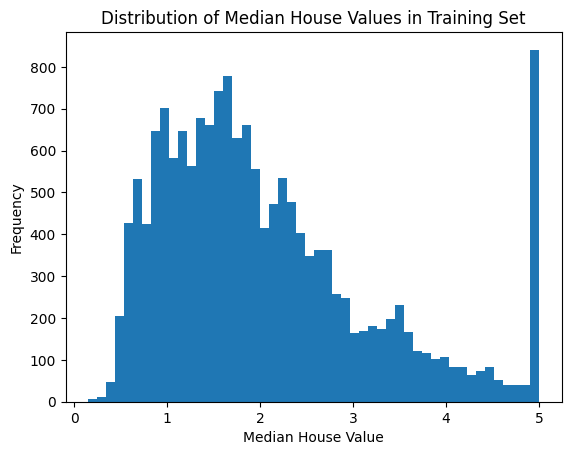

In [10]:
plt.hist(train_set['target'], bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values in Training Set')
plt.show()

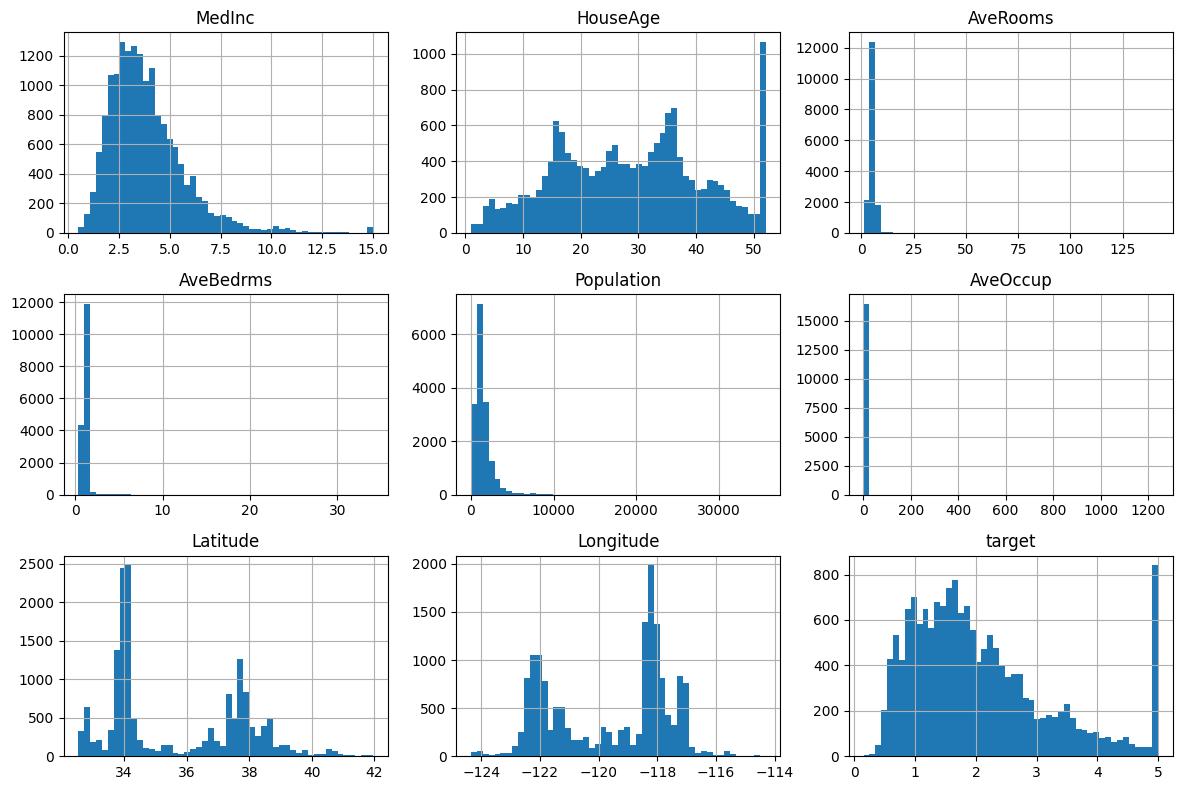

In [11]:
train_set.hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()


In [12]:
corr_matrix = train_set.corr()
corr_matrix["target"].sort_values(ascending=False)


target        1.000000
MedInc        0.687151
income_cat    0.642256
AveRooms      0.146255
HouseAge      0.114146
AveOccup     -0.021991
Population   -0.026882
AveBedrms    -0.043294
Longitude    -0.047466
Latitude     -0.142673
Name: target, dtype: float64

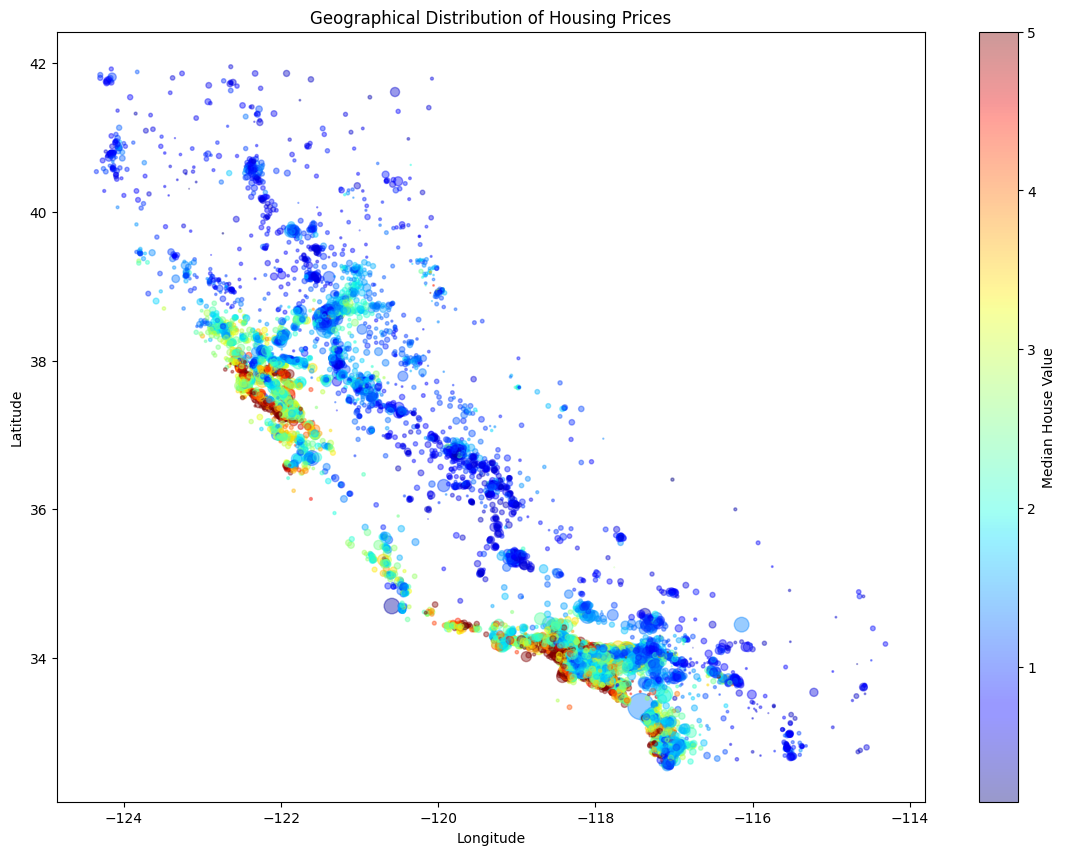

In [15]:
plt.figure(figsize=(14, 10))
plt.scatter(
    train_set["Longitude"],
    train_set["Latitude"],
    alpha=0.4,
    s=train_set["Population"] / 100,
    c=train_set["target"],
    cmap="jet"
)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Housing Prices")
plt.show()
